In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='SimHei' #顯示中文
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

## 載入訓練資料

In [6]:
#載入訓練資料
df = pd.read_csv('ALL_PP05.csv')

### 特徵包含:輪胎的幅寬、扁平比、吋別、荷重、充氣壓、以及內部相關部品尺寸及材質、最後是耐久性能

In [7]:
df

,SW,SERIES,RIM,LOAD INDEX,Rein,Air Pressure,Load,Sh,Filler H,Filler har,Apex,Cover mat,Cover ga,Liner,Car,Endurance
0,235,65,17,108,0,180,2000,152.75,35,85,3.710,1260,1.2,1.5,1000,42.07
1,245,60,18,105,0,180,1850,147.00,50,70,4.550,1260,1.0,1.5,1000,55.00
2,235,65,18,106,0,180,1900,152.75,50,70,4.550,840,1.0,1.5,1000,67.58
3,245,55,19,107,0,180,1950,134.75,45,70,4.330,1260,1.0,1.5,1000,45.51
4,255,50,20,109,0,180,2060,127.50,40,85,4.060,1260,1.2,1.5,1000,19.09
5,255,60,19,109,0,180,2060,153.00,50,85,4.550,1260,1.2,1.5,1000,43.17
6,255,50,19,107,1,220,1950,127.50,40,85,4.060,1260,1.2,1.5,1000,15.53
7,245,65,17,111,0,180,2180,159.25,50,70,4.550,1260,1.0,1.5,1000,45.13
8,265,60,18,110,0,180,2120,159.00,50,70,4.550,1260,1.0,1.5,1000,16.52
9,255,55,18,109,0,180,2060,140.25,45,85,4.330,1260,1.2,1.5,1000,29.59


## 異常值檢測(四分位數與boxplot)

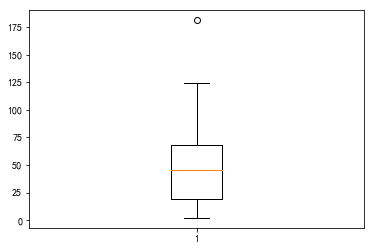

array([181.31])

In [8]:
anom = plt.boxplot(df['Endurance'],showfliers=True) 
plt.show()
anom['fliers'][0].get_data()[1]

In [9]:
from scipy.stats.mstats import mquantiles

print ('四分位數',mquantiles(df['Endurance']))

IQR = mquantiles(df['Endurance'])[2] - mquantiles(df['Endurance'])[0]
print ('IQR',IQR)
maximun = mquantiles(df['Endurance'])[2] + 1.5 * IQR
print ('最大值',maximun)
minimum = mquantiles(df['Endurance'])[0] - 1.5 * IQR
print ('最小值',minimum)

四分位數 [18.319 45.13  69.2  ]
IQR 50.880999999999986
最大值 145.52149999999997
最小值 -58.00249999999998


In [10]:
df[df['Endurance'] > maximun]

,SW,SERIES,RIM,LOAD INDEX,Rein,Air Pressure,Load,Sh,Filler H,Filler har,Apex,Cover mat,Cover ga,Liner,Car,Endurance
52,285,45,22,103,1,220,1750,128.25,40,70,4.875,1260,1.0,1.7,1500,181.31


In [11]:
#去掉異常值
df = df.drop(index = (df[df['Endurance'] > maximun]).index).reset_index(drop=True)

## 相關性分析

In [12]:
df.corr()

,SW,SERIES,RIM,LOAD INDEX,Rein,Air Pressure,Load,Sh,Filler H,Filler har,Apex,Cover mat,Cover ga,Liner,Car,Endurance
SW,1.000000,-0.499811,0.703898,0.473173,0.430005,0.457512,0.470823,-0.116758,0.069506,-0.089404,0.073914,0.574500,-0.215517,0.489567,0.577490,-0.127083
SERIES,-0.499811,1.000000,-0.850597,0.252052,-0.709148,-0.709148,0.265116,0.916713,0.076357,-0.325138,-0.022405,-0.183156,-0.260984,-0.377825,-0.193607,-0.010111
RIM,0.703898,-0.850597,1.000000,0.023649,0.563998,0.589652,0.015683,-0.656077,-0.037422,0.161527,0.018597,0.283977,0.002195,0.362678,0.404705,0.068639
LOAD INDEX,0.473173,0.252052,0.023649,1.000000,-0.147617,-0.104021,0.998611,0.510413,0.102385,-0.296330,0.045652,0.341739,-0.309729,0.046773,0.358429,-0.342458
Rein,0.430005,-0.709148,0.563998,-0.147617,1.000000,0.904895,-0.155962,-0.628976,-0.035110,0.138016,0.066956,0.269680,0.110433,0.530713,0.167348,-0.054078
Air Pressure,0.457512,-0.709148,0.589652,-0.104021,0.904895,1.000000,-0.117220,-0.618358,-0.104647,0.138016,-0.007833,0.269680,0.110433,0.447368,0.265448,-0.036290
Load,0.470823,0.265116,0.015683,0.998611,-0.155962,-0.117220,1.000000,0.524405,0.112367,-0.307705,0.056171,0.319529,-0.309759,0.052000,0.370231,-0.345600
Sh,-0.116758,0.916713,-0.656077,0.510413,-0.628976,-0.618358,0.524405,1.000000,0.109365,-0.388133,-0.008111,0.059639,-0.382609,-0.215720,0.029089,-0.072937
Filler H,0.069506,0.076357,-0.037422,0.102385,-0.035110,-0.104647,0.112367,0.109365,1.000000,-0.666909,0.975886,-0.130190,0.011616,0.226132,0.042896,-0.482347
Filler har,-0.089404,-0.325138,0.161527,-0.296330,0.138016,0.138016,-0.307705,-0.388133,-0.666909,1.000000,-0.633211,0.080361,0.357410,-0.068972,-0.207073,0.166279


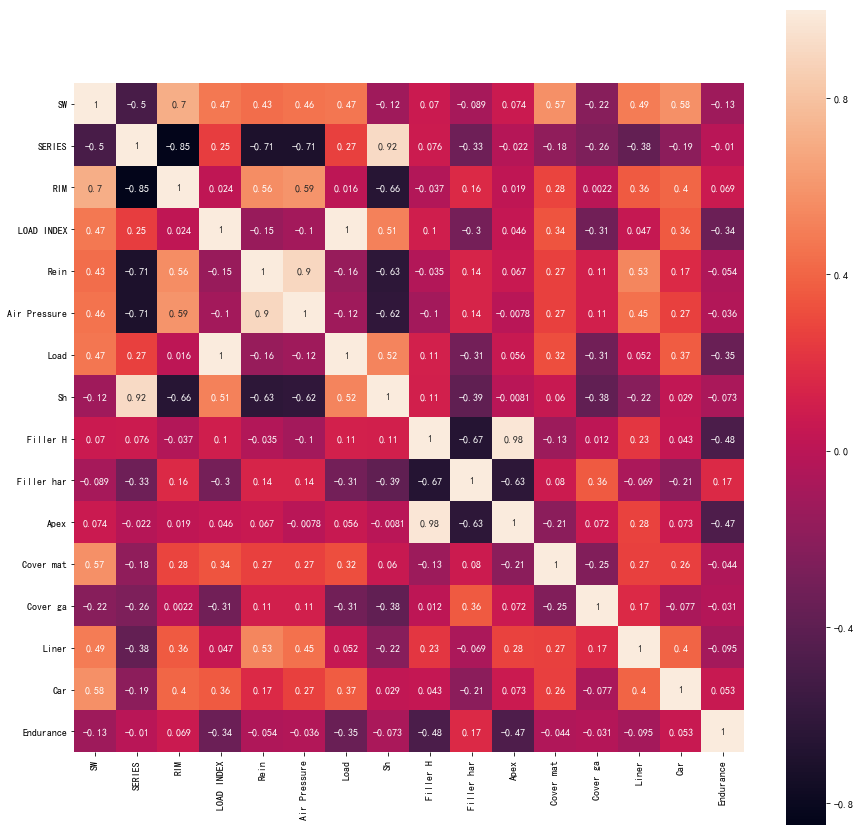

In [13]:
import seaborn as sns
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, square=True, annot=True)
plt.show()

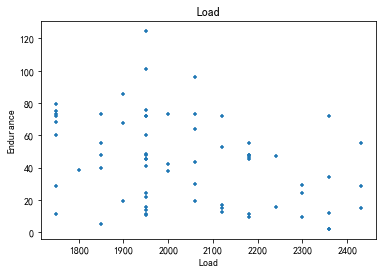

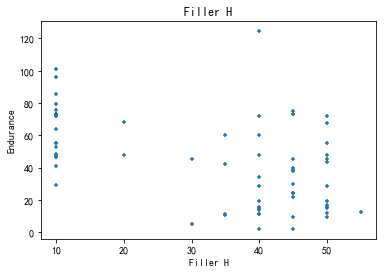

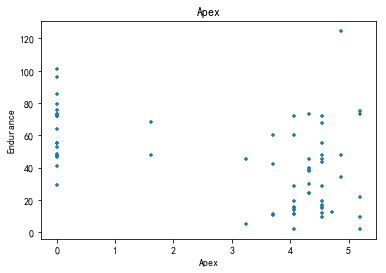

In [14]:
df.plot(kind='scatter',title='Load',figsize=(6,4),x='Load',y='Endurance',marker='+')
df.plot(kind='scatter',title='Filler H',figsize=(6,4),x='Filler H',y='Endurance',marker='+')
df.plot(kind='scatter',title='Apex',figsize=(6,4),x='Apex',y='Endurance',marker='+')

## 統計分析

In [15]:
df.describe()

,SW,SERIES,RIM,LOAD INDEX,Rein,Air Pressure,Load,Sh,Filler H,Filler har,Apex,Cover mat,Cover ga,Liner,Car,Endurance
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,252.205882,58.676471,18.308824,108.426471,0.191176,187.647059,2038.088235,147.455882,33.088235,79.485294,3.004632,1161.176471,1.132353,1.555882,1088.235294,43.918971
std,13.696670,7.852067,1.468651,3.456839,0.396151,15.846055,194.500948,17.741087,16.254263,7.286243,2.045285,179.481254,0.095325,0.090409,192.027215,27.238588
min,225.000000,40.000000,16.000000,103.000000,0.000000,180.000000,1750.000000,106.000000,10.000000,70.000000,0.000000,840.000000,1.000000,1.500000,1000.000000,2.000000
25%,245.000000,53.750000,17.000000,106.750000,0.000000,180.000000,1937.500000,134.187500,10.000000,70.000000,0.000000,1260.000000,1.000000,1.500000,1000.000000,18.447500
50%,255.000000,60.000000,18.000000,107.500000,0.000000,180.000000,1975.000000,152.000000,40.000000,85.000000,4.060000,1260.000000,1.200000,1.500000,1000.000000,45.065000
75%,265.000000,65.000000,19.000000,111.000000,0.000000,180.000000,2180.000000,159.000000,45.000000,85.000000,4.550000,1260.000000,1.200000,1.700000,1000.000000,67.685000
max,285.000000,70.000000,22.000000,115.000000,1.000000,220.000000,2430.000000,185.500000,55.000000,85.000000,5.200000,1260.000000,1.200000,1.700000,1500.000000,124.450000


In [16]:
df.mean()

SW               252.205882
SERIES            58.676471
RIM               18.308824
LOAD INDEX       108.426471
Rein               0.191176
Air Pressure     187.647059
Load            2038.088235
Sh               147.455882
Filler H          33.088235
Filler har        79.485294
Apex               3.004632
Cover mat       1161.176471
Cover ga           1.132353
Liner              1.555882
Car             1088.235294
Endurance         43.918971
dtype: float64

In [17]:
#測試條件
#test_feature = ['SW','SERIES','RIM','Air Pressure', 'Load', 'Sh','Filler H','Apex','Filler har','Car','Endurance']
test_feature = ['SW','SERIES','RIM','Air Pressure', 'Load','Filler H','Apex','Filler har','Endurance']
#test_feature = ['SW','SERIES','RIM','Air Pressure','Load','Filler H','Apex','Endurance']
df_less = df[test_feature]
df_less.head()

,SW,SERIES,RIM,Air Pressure,Load,Filler H,Apex,Filler har,Endurance
0,235,65,17,180,2000,35,3.71,85,42.07
1,245,60,18,180,1850,50,4.55,70,55.00
2,235,65,18,180,1900,50,4.55,70,67.58
3,245,55,19,180,1950,45,4.33,70,45.51
4,255,50,20,180,2060,40,4.06,85,19.09


In [18]:
#特徵
X = df_less.iloc[:, 0:df_less.shape[1]-1]
#實際結果
y = df_less.iloc[:,df_less.shape[1]-1]

## 標準化

In [19]:
#標準化:
from sklearn import preprocessing 
sc = preprocessing.StandardScaler().fit(X) #標準化

print(sc.mean_)
print(sc.scale_)

X_norm=sc.transform(X)
X_norm[:3]

[ 252.20588235   58.67647059   18.30882353  187.64705882 2038.08823529
   33.08823529    3.00463235   79.48529412]
[ 13.59558625   7.79411765   1.45781215  15.72910818 193.06549752
  16.13430333   2.03019021   7.23246896]


c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jeff\ml_1\pyds\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[-1.26554913,  0.81132075, -0.89779985, -0.48617243, -0.19728142,
         0.11849069,  0.34743919,  0.76249285],
       [-0.5300163 ,  0.16981132, -0.21184041, -0.48617243, -0.97421983,
         1.04818686,  0.76119353, -1.3114877 ],
       [-1.26554913,  0.81132075, -0.21184041, -0.48617243, -0.71524036,
         1.04818686,  0.76119353, -1.3114877 ]])

## 多變項線性迴歸模型

In [20]:
#載入線性回歸model
model = LinearRegression()
#Training
model.fit(X_norm,y)
print('係數:',model.coef_)
print('bias:',model.intercept_)
print('R2:',model.score(X_norm, y))

係數: [  2.10034005  12.6335587   14.76481786  -4.41258711 -15.35216395
 -23.38671807   3.93233888 -10.81544266]
bias: 43.918970588235304
R2: 0.5073059118031408


## 預測結果

In [21]:
#預測pp05結果
y_pred = model.predict(X_norm)
print('Predticted:',y_pred)
df_y_pred = pd.DataFrame(y_pred)
df_y_pred.to_csv('pred_PP05.csv')

from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, y_pred)))

Predticted: [33.7773217  51.58889343 54.1726762  52.48201113 31.59695449 24.13205072
 18.99440265 23.32446563 33.20879711 12.72082669 22.22904692 33.55979928
 34.99740082 35.16425051 45.46421413 42.02109103 29.28185129 21.64312943
 68.82829138 62.82887707 78.32495096 80.90873373 72.39667947 67.21809799
 73.29912604 54.61554614 41.37533204 50.06052317 59.94485464 56.6767062
 55.06651281 60.29585681 61.73345836 66.28848133 62.93614458 48.37918696
 58.81778979 35.97926484 18.99440265 55.68031707 14.63927451 24.32371115
 43.5287319  32.70076697 60.91042716 39.41341757 18.99440265 46.11943901
 48.02746588 37.3159367  51.62915966 69.91827788  4.1731948  18.48641776
 36.77553598 52.67911704  5.84482687 20.15804983 38.44716805 54.35074912
 22.22904692 30.35924778 29.4195868  54.61554614 43.25834664 31.92051646
 88.30026054 76.94306104]
MSE: 360.1740450180774
RMSE: 18.978251895737852


## 繪製結果

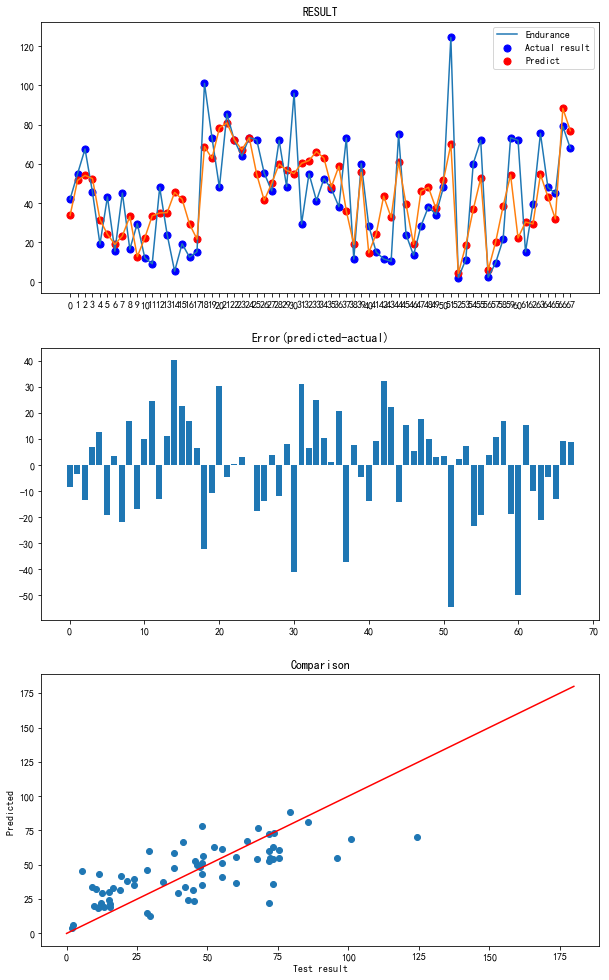

In [22]:
#繪製結果
def draw_result(y, y_pred):
    x_axis = range(len(y))
    plt.figure(figsize=[10,17])

    #實際與預測差異-散佈圖+折線
    plt.subplot(3,1,1)
    plt.title('RESULT')
    plt.xticks(np.arange(0,len(y),1))
    plt.plot(x_axis, y)
    plt.plot(x_axis, y_pred)
    plt.scatter(x_axis, y, s=50,c='blue',marker='o',label='Actual result')
    plt.scatter(x_axis, y_pred, s=50,c='red',marker='o',label = 'Predict')
    plt.legend(loc='best')

    #實際與預測差異-長條圖
    plt.subplot(3,1,2)
    error = y_pred - y
    plt.title('Error(predicted-actual)')
    plt.yticks(np.arange(-50,50,10))
    plt.bar(x_axis, error)

    #對比-越接近對角線越好
    plt.subplot(3,1,3)
    plt.title("Comparison")
    plt.scatter(y, y_pred)
    plt.plot([0, 180], [0,180],'r')
    plt.xlabel('Test result')
    plt.ylabel('Predicted ')

    plt.show()

#預測與實際結果
draw_result(y, y_pred)

## 驗證模型

In [23]:
#驗證其他規格
df_NEW = pd.read_csv('NEW_PP05_June.csv')
df_NEW_less = df_NEW[test_feature]
df_NEW_less

,SW,SERIES,RIM,Air Pressure,Load,Filler H,Apex,Filler har,Endurance
0,245,45,19,220,1700,40,4.06,78,59.25
1,255,40,19,220,1600,35,3.71,78,58.15
2,275,40,17,180,1500,40,4.06,78,69.13
3,245,40,20,220,1550,30,3.25,85,39.00


c:\users\jeff\ml_1\pyds\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


GTZ2 Testing: 0    59.25
1    58.15
2    69.13
3    39.00
Name: Endurance, dtype: float64
GTZ2 preticted: [39.69 47.65 43.09 56.1 ]
MSE: 365.78989134316106
RMSE: 19.125634403678248


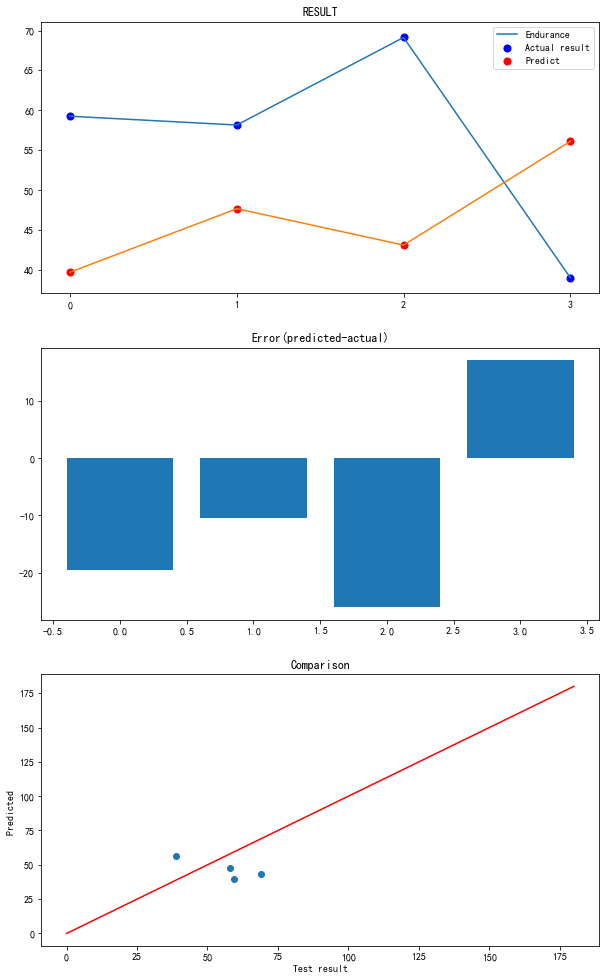

In [24]:
X_NEW = df_NEW_less.iloc[:,0:df_NEW_less.shape[1]-1]
y_NEW = df_NEW_less.iloc[:,df_NEW_less.shape[1]-1]

#standard
X_norm_NEW=sc.transform(X_NEW)

#預測GTZ2 pp05結果
y_pred_NEW = model.predict(X_norm_NEW)
print('GTZ2 Testing:',y_NEW)
print('GTZ2 preticted:',np.round(y_pred_NEW,2))

print("MSE:",metrics.mean_squared_error(y_NEW, y_pred_NEW))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_NEW, y_pred_NEW)))

#顯示結果
#預測與實際結果
draw_result(y_NEW, y_pred_NEW)

In [25]:
from ipywidgets import interact_manual 
def predict_PP05(SW,SERIES,RIM,PRESSURE,LOAD,FILLER_H,Apex,Filler_har):
    SW = float(SW)
    SERIES = float(SERIES)
    RIM = float(RIM)
    PRESSURE = float(PRESSURE)
    LOAD = float(LOAD)
    FILLER_H = float(FILLER_H)
    Filler_har = float(Filler_har)
    Apex = float(Apex)
    #pred_array = np.array([[SW,SERIES,RIM,PRESSURE,LOAD,FILLER_H,Filler_har,Apex]])
    pred_array_norm = sc.transform([[SW,SERIES,RIM,PRESSURE,LOAD,FILLER_H,Apex,Filler_har]])
    print('預測耐久結果:',model.predict(pred_array_norm))

In [26]:
interact_manual(predict_PP05, 
                SW="幅寬", 
                SERIES="扁平比",
                RIM="鋼圈",
                PRESSURE="請輸入充氣壓",
                LOAD="荷重",
                FILLER_H="FILLER H", 
                Apex="Apex",
                Filler_har= "70~85")

interactive(children=(Text(value='幅寬', description='SW'), Text(value='扁平比', description='SERIES'), Text(value=…

<function __main__.predict_PP05(SW, SERIES, RIM, PRESSURE, LOAD, FILLER_H, Apex, Filler_har)>

In [27]:
from ipywidgets import interact
interact(predict_PP05, 
         SW=(145,315,10),  
         SERIES=(20,90,5), 
         RIM=(12,26,1), 
         PRESSURE=(180,220,40), 
         LOAD=(1200,3000,10),
         FILLER_H=(10,55,5),
         Apex=(0,5.2,0.01),
         Filler_har=(70,85,1))

interactive(children=(IntSlider(value=225, description='SW', max=315, min=145, step=10), IntSlider(value=55, d…

<function __main__.predict_PP05(SW, SERIES, RIM, PRESSURE, LOAD, FILLER_H, Apex, Filler_har)>